<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Количество-книг,-выпущенных-после-1-января-2000-года" data-toc-modified-id="1.-Количество-книг,-выпущенных-после-1-января-2000-года-1">1. Количество книг, выпущенных после 1 января 2000 года</a></span></li><li><span><a href="#2.-Количество-обзоров-и-средняя-оценка-для-каждой-книги" data-toc-modified-id="2.-Количество-обзоров-и-средняя-оценка-для-каждой-книги-2">2. Количество обзоров и средняя оценка для каждой книги</a></span></li><li><span><a href="#3.-Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц" data-toc-modified-id="3.-Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-3">3. Издательство, которое выпустило наибольшее число книг толще 50 страниц</a></span></li><li><span><a href="#4.-Автор-с-самой-высокой-средней-оценкой-книг" data-toc-modified-id="4.-Автор-с-самой-высокой-средней-оценкой-книг-4">4. Автор с самой высокой средней оценкой книг</a></span></li><li><span><a href="#5.-Среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок" data-toc-modified-id="5.-Среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок-5">5. Среднее количество обзоров от пользователей, которые поставили больше 50 оценок</a></span></li><li><span><a href="#Краткие-выводы" data-toc-modified-id="Краткие-выводы-6">Краткие выводы</a></span></li></ul></div>

# Сервис для чтения книг по подписке

Цель — проанализировать базу данных.
База данных содержит информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

Задачи:

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц для исключениях из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг, учитывая только книги с 50 и более оценками;
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
 'pwd': 'Sdf4$2;d-d30pp', # пароль
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
def show(sql):
    return pd.io.sql.read_sql(sql, con = engine) 

In [4]:
query_books = '''
        SELECT * FROM books
        '''
books = show(query_books)

query_authors = '''
                SELECT * FROM authors
                '''
authors = show(query_authors)

query_publishers = '''
                   SELECT * FROM publishers
                   '''
publishers = show(query_publishers)

query_ratings = '''
                SELECT * FROM ratings
                '''
ratings = show(query_ratings)

query_reviews = '''
                SELECT * FROM reviews
                '''
reviews = show(query_reviews)

In [5]:
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [6]:
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [7]:
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [8]:
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [9]:
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


***Вывод*** 

Для анализа базы у нас в наличии пять таблиц - данные о книгах, изданиях, авторах, оценках и обзорах пользователей. Взаимосвязи между таблицами наглядно показаны в схеме ниже.

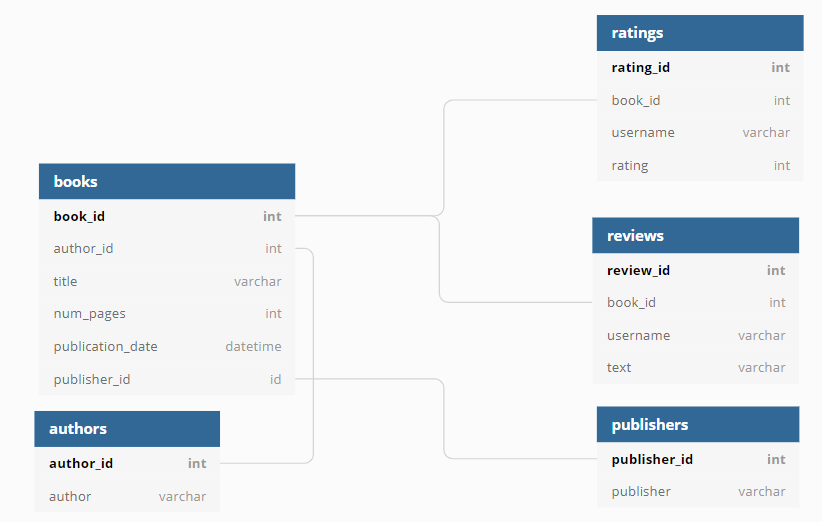

## 1. Количество книг, выпущенных после 1 января 2000 года

In [10]:
books_cnt = '''
            SELECT 
                COUNT(book_id) AS books_cnt 
            FROM 
                books
            WHERE 
                publication_date > '2000-01-01'
            '''
show(books_cnt)

,books_cnt
0,819


**819** книг было выпущено после 1 января 2000 года. 

## 2. Количество обзоров и средняя оценка для каждой книги

In [17]:
reviews_cnt = '''
              SELECT 
                  books.title AS title,
                  books.book_id AS book_id,
                  books.publication_date AS pub_date, 
                  COUNT(DISTINCT reviews.review_id) AS reviews_cnt, 
                  AVG(ratings.rating) AS rating_avg
              FROM 
                  books
              LEFT JOIN ratings ON ratings.book_id = books.book_id
              LEFT JOIN reviews ON reviews.book_id = books.book_id
              GROUP BY
                  books.title, 
                  books.book_id
              ORDER BY
                  reviews_cnt DESC
              LIMIT 10
              '''
show(reviews_cnt)

,title,book_id,pub_date,reviews_cnt,rating_avg
0,Twilight (Twilight #1),948,2006-09-06,7,3.662500
1,The Da Vinci Code (Robert Langdon #2),696,2006-03-28,6,3.830508
2,Eat Pray Love,207,2007-02-01,6,3.395833
3,The Alchemist,627,1993-05-01,6,3.789474
4,The Catcher in the Rye,673,2001-01-30,6,3.825581
5,The Curious Incident of the Dog in the Night-Time,695,2004-05-18,6,4.081081
6,Harry Potter and the Prisoner of Azkaban (Harr...,302,2004-05-01,6,4.414634
7,Harry Potter and the Chamber of Secrets (Harry...,299,1999-06-02,6,4.287500
8,Outlander (Outlander #1),497,2005-07-26,6,4.125000
9,The Book Thief,656,2006-03-14,6,4.264151


In [12]:
rating_avg = '''
              SELECT  
                  books.title AS title,
                  books.book_id AS book_id,
                  books.publication_date AS pub_date, 
                  COUNT(DISTINCT reviews.review_id) AS reviews_cnt, 
                  AVG(ratings.rating) AS rating_avg
              FROM 
                  books
              LEFT JOIN ratings ON ratings.book_id = books.book_id
              LEFT JOIN reviews ON reviews.book_id = books.book_id
              GROUP BY 
                  books.title, 
                  books.book_id
              ORDER BY
                  rating_avg DESC
              LIMIT 50
              '''
show(rating_avg)

,title,book_id,pub_date,reviews_cnt,rating_avg
0,A Woman of Substance (Emma Harte Saga #1),55,2005-12-01,2,5.000000
1,Dead Souls,182,2004-07-29,2,5.000000
2,The Walking Dead Book One (The Walking Dead #...,901,2010-10-05,2,5.000000
3,Alas Babylon,62,2005-07-05,2,5.000000
4,Welcome to Temptation (Dempseys #1),967,2004-07-11,2,5.000000
5,Evening Class,224,2005-06-30,2,5.000000
6,Tai-Pan (Asian Saga #2),610,2009-09-01,2,5.000000
7,The Demon-Haunted World: Science as a Candle i...,699,1997-02-25,2,5.000000
8,Women,993,2014-07-29,2,5.000000
9,Angels Fall,76,2006-07-11,2,5.000000


*По количеству обзоров* лидирует первая часть саги **"Сумерки"** с общим числом отзывов 7. Однако средний рейтинг в районе 3,6 пунктов.

44 книги имеют рейтинг - 5.0, но количество отзывов варьируется от 0 до 4. *Больше всего отзывов с рейтингом 5.0* получил роман **"Грязная работа"**. Также, например, сборник произведений Доктора Сьюза "Кот в шляпе и другие" не получил обзоров, но его рейтинг составляет 5.0. 

## 3. Издательство, которое выпустило наибольшее число книг толще 50 страниц

In [13]:
publisher_popular = '''
                    SELECT  
                        publishers.publisher AS pub, 
                        COUNT(books.book_id) AS books_cnt
                    FROM
                        publishers
                        LEFT JOIN books ON books.publisher_id = publishers.publisher_id
                    WHERE
                        books.num_pages > 50  
                    GROUP BY
                        pub
                    ORDER BY
                        books_cnt DESC
                    LIMIT 1
                    '''
show(publisher_popular)                   

,pub,books_cnt
0,Penguin Books,42


Самое плодотворное издательство - **Penguin Books**, оно выпустило 42 книги в базе. 

## 4. Автор с самой высокой средней оценкой книг

In [14]:
author_rating = '''
                SELECT 
                    SUBQ.author AS author,  
                    AVG(SUBQ.rating_avg) AS rating 
                FROM (
                    SELECT
                        authors.author AS author,
                        books.book_id AS id_book, 
                        AVG(ratings.rating) AS rating_avg,
                        COUNT(ratings.rating) AS rating_cnt
                    FROM 
                        authors
                        INNER JOIN books ON books.author_id = authors.author_id
                        INNER JOIN ratings ON ratings.book_id = books.book_id
                    GROUP BY 
                        author,
                        id_book
                        HAVING
                        COUNT(ratings.rating) > 50) AS SUBQ
                GROUP BY
                    author
                ORDER BY 
                    rating DESC
                LIMIT 10
                '''
show(author_rating)

,author,rating
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645
5,William Golding,3.901408
6,J.D. Salinger,3.825581
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.789474
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.787879
9,Dan Brown,3.754540


Автором, книги которого получили самую высокую оценку читателей, является **Джоан Роулинг**. 

## 5. Среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [15]:
user_reviews = '''
               SELECT 
                   ROUND(AVG(SUBQ.reviews_cnt), 2)
               FROM(
                   SELECT
                       username,
                       COUNT(review_id) AS reviews_cnt
                   FROM
                       reviews
                   WHERE 
                       username IN (
                           SELECT
                               username
                           FROM
                               ratings
                           GROUP BY
                               username 
                           HAVING 
                           COUNT(ratings.rating_id) >= 50)
                   GROUP BY
                       username) AS SUBQ
                '''
show(user_reviews)

,round
0,24.22


В среднем пользователи, поставившие более 50 оценок, написали **24 книжных обзора**.

## Краткие выводы

- 819 книг было выпущено после с 1 января 2000 года.


- По количеству обзоров лидирует первая часть саги "Сумерки" с общим числом отзывов 7. Однако средний рейтинг в районе 3,6 пунктов.


- 44 книги имеют рейтинг - 5.0, но количество отзывов варьируется от 0 до 4. Больше всего отзывов с рейтингом 5.0 получил роман "Грязная работа". Также, например, сборник произведений Доктора Сьюза "Кот в шляпе и другие" не получил обзоров, но его рейтинг составляет 5.0.


- Самое плодотворное издательство - Penguin Books, оно выпустило 42 книги в базе.


- Автором, книги которого получили самую высокую оценку читателей, является Джоан Роулинг.


- В среднем пользователи, поставившие более 50 оценок, написали 24 книжных обзора.